In [80]:
from scipy import stats
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
format = "Chi Square: {0}\np-value: {1}"# "\nArray: {2}"

In [3]:
a=stats.chi2.cdf(2 , 2)
b=stats.chi2.cdf(4 , 2)
c=b-a
print(a)
print(b)
print(c)

0.6321205588285577
0.8646647167633873
0.23254415793482963


### D6

In [70]:
expect = pd.DataFrame([10,10,10,10,10,10])

In [71]:
observed = pd.DataFrame([10,10,10,5,10,15])

In [74]:
res = stats.chisquare(f_obs=observed, f_exp=expect)

In [81]:
print(format.format(res[0], res[1]))

Chi Square: [5.]
p-value: [0.41588019]


### Political party

In [85]:
expect = pd.DataFrame([30, 30, 30])

In [86]:
observed = pd.DataFrame([10, 30, 50])

In [87]:
res = stats.chisquare(f_obs=observed, f_exp=expect)

In [88]:
print(format.format(res[0], res[1]))

Chi Square: [26.66666667]
p-value: [1.61959679e-06]


### Gender Difference

In [14]:
expect = pd.DataFrame([12, 12])

In [15]:
observed = pd.DataFrame([15, 9])

In [90]:
res = stats.chisquare(f_obs=observed, f_exp=expect)

In [92]:
print(format.format(res[0], res[1]))

Chi Square: [26.66666667]
p-value: [1.61959679e-06]


### Snowden

1500 - group size
53% - postive
47% - negative

In [29]:
group_size = 1500
pos = (group_size/100)*53
neg = group_size - pos

In [30]:
expect = pd.DataFrame([group_size/2, group_size/2])

In [31]:
observed = pd.DataFrame([pos, neg])

In [94]:
res = stats.chisquare(f_obs=observed, f_exp=expect)

In [95]:
print(format.format(res[0], res[1]))

Chi Square: [26.66666667]
p-value: [1.61959679e-06]


### Contingency table

In [119]:
format = "Chi Square: {0}\np-value: {1}\nDegree of Freedom:{2}\nArray:\n{3}"

In [120]:
observed = pd.DataFrame([[10, 6], [5, 15]])

In [121]:
res = stats.chi2_contingency(observed)

In [122]:
print(format.format(res[0], res[1], res[2], res[3]))

Chi Square: 3.715714285714286
p-value: 0.053902557169387154
Degree of Freedom:1
Array:
[[ 6.66666667  9.33333333]
 [ 8.33333333 11.66666667]]


### Gender Difference Pt.2

In [111]:
man_tot = 26
wom_tot = 15
bio_tot = 24
inf_tot = 17
man_proc = (man_tot/(man_tot+wom_tot)) * 100
wom_proc = 100 - man_proc
freq_man_bio = bio_tot/100 * man_proc
freq_wom_bio = bio_tot - freq_man_bio
freq_man_inf = inf_tot/100 * man_proc
freq_wom_inf = inf_tot - freq_man_inf
print(f"man_proc: {man_proc}")
print(f"wom_proc: {wom_proc}")
print(f"freq_man_bio: {freq_man_bio}")
print(f"freq_wom_bio: {freq_wom_bio}")
print(f"freq_man_inf: {freq_man_inf}")
print(f"freq_wom_inf: {freq_wom_inf}")

man_proc: 63.41463414634146
wom_proc: 36.58536585365854
freq_man_bio: 15.21951219512195
freq_wom_bio: 8.78048780487805
freq_man_inf: 10.78048780487805
freq_wom_inf: 6.2195121951219505


In [126]:
observed = pd.DataFrame([[15, 9], [11, 6]])
observed

,0,1
0,15,9
1,11,6


In [127]:
expect = pd.DataFrame([[freq_man_bio, freq_wom_bio], [freq_man_inf, freq_wom_inf]])
expect

,0,1
0,15.219512,8.780488
1,10.780488,6.219512


In [128]:
pd.DataFrame(stats.contingency.expected_freq(observed))

,0,1
0,15.219512,8.780488
1,10.780488,6.219512


In [129]:
res = stats.chi2_contingency(observed=observed)

In [130]:
print(format.format(res[0], res[1], res[2], res[3]))

Chi Square: 0.0340764831573656
p-value: 0.8535442239746989
Degree of Freedom:1
Array:
[[15.2195122  8.7804878]
 [10.7804878  6.2195122]]


### Breaks

In [131]:
breaks =  pd.DataFrame([[20, 15], [11, 12], [7, 9]])

In [133]:
res = stats.chi2_contingency(observed=breaks, correction=True)

In [134]:
print(format.format(res[0], res[1], res[2], res[3]))

Chi Square: 0.9544070774762996
p-value: 0.6205162173513055
Degree of Freedom:2
Array:
[[17.97297297 17.02702703]
 [11.81081081 11.18918919]
 [ 8.21621622  7.78378378]]


###  Aspirine

In [141]:
pills = pd.DataFrame([[18, 7], [6, 13]])

In [142]:
res = stats.chi2_contingency(observed=pills, correction=True)

In [143]:
print(format.format(res[0], res[1], res[2], res[3]))

Chi Square: 5.57719298245614
p-value: 0.018195864430772903
Degree of Freedom:1
Array:
[[13.63636364 11.36363636]
 [10.36363636  8.63636364]]


In [146]:
pills

,0,1
0,18,7
1,6,13


In [147]:
pills = pills.rename(columns={0:"Trombosis", 1:"Normal"})
pills[0] = ["Placebo", "Aspirine"]
pills = pills.set_index(0)
pills

,Trombosis,Normal
0,,
Placebo,18,7
Aspirine,6,13


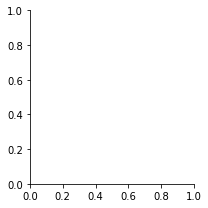

In [149]:
sns.FacetGrid(pills)